In [1]:
!pip install pandas matplotlib seaborn


In [2]:
import pandas as pd

# Load transaction data
transaction_data = pd.read_csv('/kaggle/input/chips-company-dataset/QVI_transaction_data.csv')

# Load purchase behavior data
purchase_behavior = pd.read_csv('/kaggle/input/chips-company-dataset/QVI_purchase_behaviour.csv')

# Preview the first few rows to ensure the data is loaded correctly
print(transaction_data.head())
print(purchase_behavior.head())


         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  17-10-2018          1            1000       1         5   
1  14-05-2019          1            1307     348        66   
2  20-05-2019          1            1343     383        61   
3  17-08-2018          2            2373     974        69   
4  18-08-2018          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES       

In [3]:
# Check the structure of transaction data
print(transaction_data.info())

# Check for missing values
print(transaction_data.isnull().sum())

# Check summary statistics
print(transaction_data.describe())

# Preview the first few rows
print(transaction_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB
None
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
          STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  264836.00000    2.648360e+05  2.648360e+05  264836.000000   
mean      135.08011    1.355495e+05  1.351583e+05    

In [4]:
# Check the structure of purchase behavior data
print(purchase_behavior.info())

# Check for missing values
print(purchase_behavior.isnull().sum())

# Preview the first few rows
print(purchase_behavior.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [5]:
# Merge the transaction data with the purchase behavior data on LYLTY_CARD_NBR
merged_data = pd.merge(transaction_data, purchase_behavior, on='LYLTY_CARD_NBR', how='inner')

# Preview the merged data
print(merged_data.head())

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  17-10-2018          1            1000       1         5   
1  14-05-2019          1            1307     348        66   
2  20-05-2019          1            1343     383        61   
3  17-08-2018          2            2373     974        69   
4  18-08-2018          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Bu

In [6]:
# High-level summary of merged data
print(merged_data.describe())

# Check for missing values in merged data
print(merged_data.isnull().sum())


          STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  264836.00000    2.648360e+05  2.648360e+05  264836.000000   
mean      135.08011    1.355495e+05  1.351583e+05      56.583157   
std        76.78418    8.057998e+04  7.813303e+04      32.826638   
min         1.00000    1.000000e+03  1.000000e+00       1.000000   
25%        70.00000    7.002100e+04  6.760150e+04      28.000000   
50%       130.00000    1.303575e+05  1.351375e+05      56.000000   
75%       203.00000    2.030942e+05  2.027012e+05      85.000000   
max       272.00000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  
mean        1.907309       7.304200  
std         0.643654       3.083226  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000  
DATE                0
STORE_NBR           0
L

In [7]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER to calculate total sales
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort by total sales to see the most valuable segments
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)
print(sales_by_segment)


                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       Mainstream  155677.05
15          YOUNG FAMILIES           Budget  139345.85
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
7           OLDER FAMILIES       Mainstream  103445.55
14                RETIREES          Premium   97646.05
16          YOUNG FAMILIES       Mainstream   92788.75
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
17          YOUNG FAMILIES          Premium   84025.50
8           OLDER FAMILIES          Premium   81958.40
18   YOUNG SINGLES/COUPLES           Budget   61141.60
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
20   YOUNG SINGLES/COUPLES          Premium   41642.10
0   MIDAGE

Analysis & Interpretation:
Top Spenders:

Older Families (Budget) and Young Singles/Couples (Mainstream) are the top spenders, with over 150,000 in total sales.
Retirees (Mainstream) and Young Families (Budget) also contribute significantly to total sales.
Budget and Mainstream Customers Dominate:

A significant portion of the revenue comes from Budget and Mainstream customer segments, indicating that these groups are less likely to opt for premium products.
Premium Customers:

The Premium category tends to be smaller in terms of total sales, with Retirees and Young Families contributing the most from this segment.
This could be an opportunity to target premium customers with specialized marketing strategies.
Strategic Recommendations Based on Insights:
Focus on Budget and Mainstream Customers:

Older Families (Budget) and Young Singles/Couples (Mainstream) are the most valuable customer segments. We should consider creating promotional campaigns that target these segments, such as discounts, loyalty rewards, or combo offers.
Expand Premium Offerings for Young Families and Retirees:

While premium customers are a smaller group, there is still significant spending among Young Families (Premium) and Retirees (Premium). Introducing exclusive high-end product lines or bundling premium products could encourage more spending within these groups.
New Families Segment:

The New Families segment, especially in the premium category, shows relatively low sales. This suggests either under-engagement or under-representation. We can develop strategies to better target this group, such as new product offerings for family events or targeted advertising.

In [8]:
# Calculate average purchase amount per transaction
avg_purchase_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

# Sort to see which group spends the most on average per transaction
avg_purchase_by_segment = avg_purchase_by_segment.sort_values(by='TOT_SALES', ascending=False)
print(avg_purchase_by_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
1   MIDAGE SINGLES/COUPLES       Mainstream   7.647284
19   YOUNG SINGLES/COUPLES       Mainstream   7.558339
14                RETIREES          Premium   7.456174
11   OLDER SINGLES/COUPLES          Premium   7.449766
12                RETIREES           Budget   7.443445
9    OLDER SINGLES/COUPLES           Budget   7.430315
8           OLDER FAMILIES          Premium   7.322945
4             NEW FAMILIES       Mainstream   7.317806
3             NEW FAMILIES           Budget   7.297321
15          YOUNG FAMILIES           Budget   7.287201
10   OLDER SINGLES/COUPLES       Mainstream   7.282116
6           OLDER FAMILIES           Budget   7.269570
17          YOUNG FAMILIES          Premium   7.266756
7           OLDER FAMILIES       Mainstream   7.262395
13                RETIREES       Mainstream   7.252262
5             NEW FAMILIES          Premium   7.231655
16          YOUNG FAMILIES       Mainstream   7.189025
2   MIDAGE

Insights:
Top Average Purchase per Transaction:

Midage Singles/Couples (Mainstream) and Young Singles/Couples (Mainstream) have the highest average purchases per transaction, both above 7.5.
Premium Retirees and Older Singles/Couples also show high average purchases per transaction, indicating that they spend more on average when they shop.
Budget and Premium Customers:

Midage Singles/Couples (Budget) and Young Singles/Couples (Budget) have the lowest average purchases per transaction, suggesting that these groups make smaller purchases.
Interestingly, Premium customers (especially Retirees and Older Singles/Couples) tend to have higher average transaction amounts, which is expected given the premium nature of the products.
Segment Opportunity:

Young Singles/Couples (Budget) have a lower average transaction value. This could be a segment to target with upselling techniques, like offering discounts on larger quantities or bundling.
Strategic Recommendations:
Boost Transactions Among Low Spenders:

Target the Young Singles/Couples (Budget) and Midage Singles/Couples (Budget) segments with promotions aimed at increasing their average transaction size. Examples include offering deals on bulk purchases or loyalty points for larger transactions.
Continue Engagement with Top-Spending Segments:

Segments like Midage Singles/Couples (Mainstream) and Young Singles/Couples (Mainstream) spend more per transaction, indicating they are valuable customers. Loyalty programs and exclusive offers could be used to retain these segments.
Cross-Sell Premium Products:

Segments like Retirees (Premium) and Older Singles/Couples (Premium) show high average purchases per transaction. You could cross-sell premium products or offer new premium products to keep these customers engaged.

In [9]:
# Calculate total quantity of products purchased by segment
quantity_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

# Sort by total quantity purchased
quantity_by_segment = quantity_by_segment.sort_values(by='PROD_QTY', ascending=False)
print(quantity_by_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  PROD_QTY
6           OLDER FAMILIES           Budget     45065
13                RETIREES       Mainstream     40518
19   YOUNG SINGLES/COUPLES       Mainstream     38632
15          YOUNG FAMILIES           Budget     37111
9    OLDER SINGLES/COUPLES           Budget     35220
10   OLDER SINGLES/COUPLES       Mainstream     34997
11   OLDER SINGLES/COUPLES          Premium     33986
12                RETIREES           Budget     28764
7           OLDER FAMILIES       Mainstream     27756
16          YOUNG FAMILIES       Mainstream     25044
14                RETIREES          Premium     24884
1   MIDAGE SINGLES/COUPLES       Mainstream     22699
17          YOUNG FAMILIES          Premium     22406
8           OLDER FAMILIES          Premium     22171
18   YOUNG SINGLES/COUPLES           Budget     16671
2   MIDAGE SINGLES/COUPLES          Premium     15526
20   YOUNG SINGLES/COUPLES          Premium     11331
0   MIDAGE SINGLES/COUPLES  

Key Observations:
Top Product Purchasers:

Older Families (Budget) top the list with 45,065 products purchased.
Retirees (Mainstream) and Young Singles/Couples (Mainstream) follow with 40,518 and 38,632 products purchased, respectively.
High Product Quantities in Budget Segments:

Older Families (Budget) and Young Families (Budget) have high product purchases. This suggests that budget-conscious families tend to purchase in bulk or more frequently.
Older Singles/Couples (Budget) also make significant product purchases, possibly due to larger household sizes.
Mainstream vs. Premium Customers:

While Mainstream customers, like Retirees (Mainstream) and Older Singles/Couples (Mainstream), make large product purchases, Premium customers purchase comparatively fewer products.
For example, Older Singles/Couples (Premium) have 33,986 total purchases, compared to 40,518 for Retirees (Mainstream).
New Families Segment:

The New Families segment, regardless of their premium level, has the lowest total product quantities purchased. This could indicate a smaller household size or less frequent shopping habits.
Strategic Recommendations:
Increase Engagement with Premium Segments:

Since Premium customers purchase fewer products on average than Mainstream or Budget customers, you could introduce tailored offers to increase their product quantities, such as exclusive deals or loyalty programs focused on bulk purchases.
Upselling to Budget-Conscious Families:

Given that Older Families (Budget) and Young Families (Budget) purchase in high quantities, cross-sell and upsell opportunities can be introduced by offering deals that bundle premium products with budget ones, encouraging them to try higher-end items.
Boost Purchases Among New Families:

The New Families segment shows the lowest total product purchases across all categories. Target this segment with family-oriented deals, larger pack sizes, or subscription options for frequently purchased items to drive up product quantity.
Tailor Marketing Based on Product Quantity:

Focus marketing efforts on top segments like Older Families (Budget) and Young Singles/Couples (Mainstream) who purchase large quantities. Promoting product bundles or offering discounts on bulk purchases may resonate well with these high-quantity buyers.

In [10]:
# Check for outliers by looking at high product quantities
outliers = merged_data[merged_data['PROD_QTY'] > 10]
print(outliers)

# If necessary, you can filter out these outliers:
filtered_data = merged_data[merged_data['PROD_QTY'] <= 10]

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  19-08-2018        226          226000  226201         4   
69763  20-05-2019        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   
69763  Dorito Corn Chp     Supreme 380g       200      650.0  OLDER FAMILIES   

      PREMIUM_CUSTOMER  
69762          Premium  
69763          Premium  


High Product Quantity:

Both transactions have a PROD_QTY of 200, which is unusually high for a single purchase. Typically, most customers buy between 1 to 5 units of a product, but 200 units in a single transaction seems like an anomaly.
Same Product, Customer, and Store:

Both transactions are from STORE_NBR 226 and by the same LYLTY_CARD_NBR (226000), indicating that this may be a bulk purchase by a specific customer or a potential data entry error.
Date and Pricing:

The dates of these purchases are August 2018 and May 2019, spread across different time periods but involving the same product and sales amount.

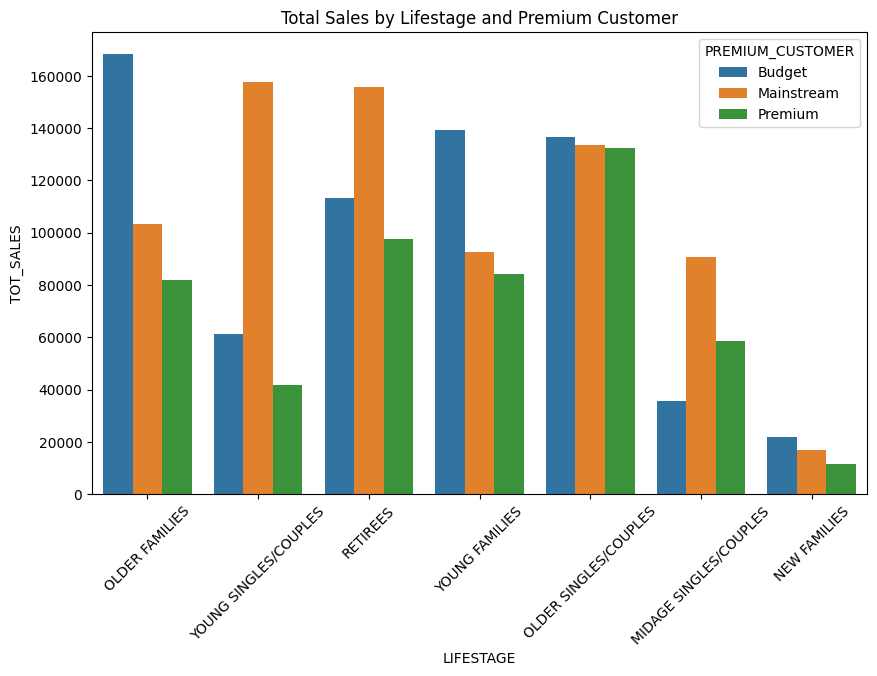

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total sales by customer segment
plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.show()